# Amazon India Sales Analysis

**Objective**: Increase revenue and improve product category performance

### About Dataset

 Column Name |	Description
-------------|-------------
 Category | Type of product. (String)
 Size | Size of the product. (String)
 Date | Date of the sale. (Date)
 Status | Status of the sale. (String)
 Fulfilment | Method of fulfilment. (String)
 Style	| Style of the product. (String)
 SKU	| Stock Keeping Unit. (String)
 ASIN | Amazon Standard Identification Number. (String)
 Courier Status | Status of the courier. (String)
 Qty	| Quantity of the product. (Integer)
 Amount | Amount of the sale. (Float)
 B2B	| Business to business sale. (Boolean)
 Currency | The currency used for the sale. (String)

Data source: [ANil on Kaggle](https://www.kaggle.com/datasets/thedevastator/unlock-profits-with-e-commerce-sales-data)

### Data Pre-Processing

##### Preview

In [1]:
# import needed libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read amazon sales dataset
df = pd.read_csv('/content/drive/MyDrive/Datasets/E-CommerceSales/Amazon_Sale_Report.csv')

<ipython-input-2-859240956266>:2: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Datasets/E-CommerceSales/Amazon_Sale_Report.csv')


In [3]:
# read 5 first row of dataset
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [4]:
# check missing values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [5]:
# count of unique values for each columns
df.nunique().to_frame(name='Count of unique values')

,Count of unique values
index,128975
Order ID,120378
Date,91
Status,13
Fulfilment,2
Sales Channel,2
ship-service-level,2
Style,1377
SKU,7195
Category,9


In [6]:
df.apply(pd.unique).to_frame(name='Unique Values')

,Unique Values
index,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
Order ID,"[405-8078784-5731545, 171-9198151-1101146, 404..."
Date,"[04-30-22, 04-29-22, 04-28-22, 04-27-22, 04-26..."
Status,"[Cancelled, Shipped - Delivered to Buyer, Ship..."
Fulfilment,"[Merchant, Amazon]"
Sales Channel,"[Amazon.in, Non-Amazon]"
ship-service-level,"[Standard, Expedited]"
Style,"[SET389, JNE3781, JNE3371, J0341, JNE3671, SET..."
SKU,"[SET389-KR-NP-S, JNE3781-KR-XXXL, JNE3371-KR-X..."
Category,"[Set, kurta, Western Dress, Top, Ethnic Dress,..."


In [7]:
# summary statistics
df.describe()

,index,Qty,Amount,ship-postal-code
count,128975.000000,128975.000000,121180.000000,128942.000000
mean,64487.000000,0.904431,648.561465,463966.236509
std,37232.019822,0.313354,281.211687,191476.764941
min,0.000000,0.000000,0.000000,110001.000000
25%,32243.500000,1.000000,449.000000,382421.000000
50%,64487.000000,1.000000,605.000000,500033.000000
75%,96730.500000,1.000000,788.000000,600024.000000
max,128974.000000,15.000000,5584.000000,989898.000000


In [8]:
# summary statistics for string
df.describe(include='O').T

,count,unique,top,freq
Order ID,128975,120378,171-5057375-2831560,12
Date,128975,91,05-03-22,2085
Status,128975,13,Shipped,77804
Fulfilment,128975,2,Amazon,89698
Sales Channel,128975,2,Amazon.in,128851
ship-service-level,128975,2,Expedited,88615
Style,128975,1377,JNE3797,4224
SKU,128975,7195,JNE3797-KR-L,773
Category,128975,9,Set,50284
Size,128975,11,M,22711


In [9]:
# count missing values
df.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64

##### Data Cleaning

In [10]:
# dropping columns
df.drop(columns= ['index','Unnamed: 22', 'fulfilled-by', 'ship-country', 'currency', 'Sales Channel '], inplace = True)

In [11]:
# checking duplicates
df[df.duplicated(['Order ID', 'ASIN'], keep=False)]

,Order ID,Date,Status,Fulfilment,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,promotion-ids,B2B
30660,406-0372545-6086735,04-12-22,Cancelled,Amazon,Expedited,SET197,SET197-KR-NP-L,Set,L,B08B3YPD63,Cancelled,0,NaN,Siliguri,WEST BENGAL,734008.0,NaN,False
30661,406-0372545-6086735,04-12-22,Cancelled,Amazon,Expedited,SET197,SET197-KR-NP-L,Set,L,B08B3YPD63,Cancelled,0,NaN,Siliguri,WEST BENGAL,734008.0,NaN,False
41291,408-0373839-4433120,04-05-22,Cancelled,Amazon,Expedited,JNE3501,JNE3501-KR-M,kurta,M,B08MYVCDB4,Cancelled,0,NaN,BENGALURU,KARNATAKA,560072.0,NaN,False
41292,408-0373839-4433120,04-05-22,Cancelled,Amazon,Expedited,JNE3501,JNE3501-KR-M,kurta,M,B08MYVCDB4,Cancelled,0,NaN,BENGALURU,KARNATAKA,560072.0,NaN,False
52330,407-8364731-6449117,05-29-22,Shipped,Amazon,Expedited,JNE3769,JNE3769-KR-L,kurta,L,B09K3T675B,Cancelled,0,NaN,Theni,TAMIL NADU,625579.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False
52333,407-8364731-6449117,05-29-22,Shipped,Amazon,Expedited,JNE3769,JNE3769-KR-L,kurta,L,B09K3T675B,Shipped,1,487.0,Theni,TAMIL NADU,625579.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False
79844,171-9628368-5329958,05-07-22,Cancelled,Amazon,Expedited,J0329,J0329-KR-L,kurta,L,B09KXRB7JV,Cancelled,0,NaN,ERNAKULAM,KERALA,682017.0,NaN,False
79845,171-9628368-5329958,05-07-22,Cancelled,Amazon,Expedited,J0329,J0329-KR-L,kurta,L,B09KXRB7JV,Cancelled,0,NaN,ERNAKULAM,KERALA,682017.0,NaN,False
85790,171-3249942-2207542,05-03-22,Shipped,Amazon,Expedited,SET323,SET323-KR-NP-XL,Set,XL,B09NDKKM7P,Shipped,1,939.0,PUNE,MAHARASHTRA,411057.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False
85791,171-3249942-2207542,05-03-22,Shipped,Amazon,Expedited,SET323,SET323-KR-NP-XL,Set,XL,B09NDKKM7P,Shipped,1,939.0,PUNE,MAHARASHTRA,411057.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False


In [12]:
# total of duplicates
len(df)-len(df.drop_duplicates(['Order ID','ASIN']))

7

In [13]:
# dropping duplicates
df.drop_duplicates(['Order ID','ASIN'],inplace = True,ignore_index=True)

##### Handle Missing Values

In [14]:
# filling NaN values with 'unknown'
df['Courier Status'].fillna('unknown', inplace=True)

In [15]:
# filling NaN values in 'promotion-ids' with 'no promotion'
df['promotion-ids'].fillna('no promotion', inplace=True)

In [16]:
# see the percentage of each status for an unknown amount of sales
df[df['Amount'].isnull()]['Status'].value_counts(normalize=True).apply(lambda x: format(x, '.2%'))

Status
Cancelled                       97.06%
Shipped                          2.67%
Shipped - Delivered to Buyer     0.10%
Shipping                         0.10%
Shipped - Returned to Seller     0.04%
Pending                          0.03%
Name: proportion, dtype: object

In [17]:
# from above we know that most of the status is 'canceled', so we can replace the missing value with 0
df['Amount'].fillna(0, inplace=True)

In [18]:
# for place, we can replace missing values with 'unknown'
df['ship-state'].fillna('unknown', inplace=True)
df['ship-city'].fillna('unknown', inplace=True)
df['ship-postal-code'].fillna('unknown', inplace=True)

##### Formatting

In [19]:
# renaming columns
newname = {'Order ID':'order_id', 'Date':'date', 'Status':'ship_status', 'Fulfilment':'fulfilment',
          'ship-service-level':'service_level', 'Style':'style', 'SKU':'sku', 'Category':'product_category',
          'Size':'size', 'ASIN':'asin', 'Courier Status':'courier_status', 'Qty':'order_quantity',
          'Amount':'order_amount_(Rp)', 'ship-city':'city', 'ship-state':'state', 'ship-postal-code':'zip',
          'promotion-ids':'promotion','B2B':'customer_type'}

In [20]:
df.rename(columns=newname, inplace=True)

In [21]:
# convert INR to IDR using an exchane rate of 1 INR = 190.74 IDR
exchange_rate = 190.74
df['order_amount_(Rp)'] = df['order_amount_(Rp)'].apply(lambda x: x*exchange_rate)

In [22]:
# convert B2B column values (True = business, False = customer)
df['customer_type'].replace(to_replace=[True,False],value=['business','customer'], inplace=True)

In [23]:
# creating datetime and adding month column
df['date'] = pd.to_datetime(df['date'])

<ipython-input-23-72ce07586b2d>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


In [24]:
# sort by datetime
df.sort_values(by='date', inplace=True)

In [25]:
# define the desired order for the 'size' column
size_order = ['Free','XS', 'S', 'M', 'L', 'XL', 'XXL', '3XL', '4XL', '5XL', '6XL']

# Create an ordered categorical variable for the 'size' column
df['size'] = pd.Categorical(df['size'], categories=size_order, ordered=True)

In [26]:
# add 'month' column
df['month']=df['date'].dt.month

In [27]:
df['month'].unique()

array([3, 4, 5, 6], dtype=int32)

In [28]:
# get the number of unique days in each month
m_name = ['march', 'april', 'may', 'june']

for i,m in zip(m_name,[3,4,5,6]):
  total_date = df['date'][df['date'].dt.month == m].dt.day.nunique()
  print(i,' : ', total_date)

march  :  1
april  :  30
may  :  31
june  :  29


In [29]:
# from above we know that the transaction record in March has only one day,
# so we will drop the march
df.drop(df[df['month'] == 3].index, inplace=True)

In [30]:
# checking if successfully drop the march
df['month'].unique()

array([4, 5, 6], dtype=int32)

In [31]:
# rename month
months = {4:'april', 5:'may', 6:'june'}
df['month'] = df['date'].dt.month.map(months)

In [32]:
print('This dataset contains the months', df['month'].unique(), 'for 2022')
print('The earliest date is', df['date'].min())
print('The latest date is', df['date'].max())

This dataset contains the months ['april' 'may' 'june'] for 2022
The earliest date is 2022-04-01 00:00:00
The latest date is 2022-06-29 00:00:00


##### Checking the Clean Data

In [33]:
df.describe(include='all')

,order_id,date,ship_status,fulfilment,service_level,style,sku,product_category,size,asin,courier_status,order_quantity,order_amount_(Rp),city,state,zip,promotion,customer_type,month
count,128797,128797,128797,128797,128797,128797,128797,128797,128797,128797,128797,128797.000000,1.287970e+05,128797,128797,128797.0,128797,128797,128797
unique,120220,NaN,13,2,2,1377,7194,9,11,7189,4,NaN,NaN,8953,70,9460.0,5784,2,3
top,171-5057375-2831560,NaN,Shipped,Amazon,Expedited,JNE3797,JNE3797-KR-L,Set,M,B09SDXFFQ1,Shipped,NaN,NaN,BENGALURU,MAHARASHTRA,201301.0,no promotion,customer,april
freq,12,NaN,77664,89543,88460,4221,772,50206,22679,772,109331,NaN,NaN,11200,22235,1004.0,49088,127926,49065
mean,NaN,2022-05-12 13:11:06.099365888,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.904439,1.162354e+05,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,2022-04-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2022-04-20 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,7.877562e+04,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,2022-05-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.112090e+05,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,2022-06-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.470605e+05,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,2022-06-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.000000,1.065092e+06,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
df.isnull().sum()

order_id             0
date                 0
ship_status          0
fulfilment           0
service_level        0
style                0
sku                  0
product_category     0
size                 0
asin                 0
courier_status       0
order_quantity       0
order_amount_(Rp)    0
city                 0
state                0
zip                  0
promotion            0
customer_type        0
month                0
dtype: int64

In [35]:
df.nunique().to_frame(name='Count of unique values')

,Count of unique values
order_id,120220
date,90
ship_status,13
fulfilment,2
service_level,2
style,1377
sku,7194
product_category,9
size,11
asin,7189


In [36]:
df.apply(pd.unique).to_frame(name='Unique Values')

,Unique Values
order_id,"[405-2985286-8470763, 408-1765460-8049113, 408..."
date,"[2022-04-01T00:00:00.000000000, 2022-04-02T00:..."
ship_status,"[Cancelled, Shipped, Shipped - Delivered to Bu..."
fulfilment,"[Amazon, Merchant]"
service_level,"[Expedited, Standard]"
style,"[JNE3634, SET144, JNE3546, JNE3810, SET273, SE..."
sku,"[JNE3634-KR-XL, SET144-KR-NP-XL, JNE3546-KR-XL..."
product_category,"[kurta, Set, Blouse, Western Dress, Top, Ethni..."
size,"['XL', 'XXL', 'S', 'M', '3XL', ..., 'XS', 'Fre..."
asin,"[B097ZZLC2X, B0822SZ9FN, B08HK5JSM1, B09RKC4B4..."


### Preliminary Insights

In [37]:
# revenue by month
revenue_by_month = df.groupby('month')['order_amount_(Rp)'].sum()
percent_revenue_change_apr_to_may = ((revenue_by_month['may'] - revenue_by_month['april']) / revenue_by_month['april']) * 100
percent_revenue_change_may_to_jun = ((revenue_by_month['june'] - revenue_by_month['may']) / revenue_by_month['may']) * 100
total_change = ((revenue_by_month['june'] - revenue_by_month['april']) / revenue_by_month['april']) * 100

print(f"Total revenue for April 2022: Rp{revenue_by_month['april']:,.2f}")
print(f"Total revenue for May 2022: Rp{revenue_by_month['may']:,.2f}, which is a {percent_revenue_change_apr_to_may:.2f}% decrease from April.")
print(f"Total revenue for June 2022: Rp{revenue_by_month['june']:,.2f}, which is a {percent_revenue_change_may_to_jun:.2f}% decrease from May.")
print(f"Total revenue for Q2 2022 decreased by {total_change:.2f}%")

Total revenue for April 2022: Rp5,500,695,224.96
Total revenue for May 2022: Rp5,002,064,515.64, which is a -9.06% decrease from April.
Total revenue for June 2022: Rp4,468,017,050.52, which is a -10.68% decrease from May.
Total revenue for Q2 2022 decreased by -18.77%


In [38]:
# revenue by category
revenue_by_category = df.groupby('product_category')['order_amount_(Rp)'].sum().sort_values(ascending=False)
print('Total revenue by product category:')
print(revenue_by_category.apply(lambda x: 'Rp{:,.2f}'.format(x)))

Total revenue by product category:
product_category
Set              Rp7,467,115,847.84
kurta            Rp4,055,946,884.60
Western Dress    Rp2,137,893,918.26
Top              Rp1,019,177,475.16
Ethnic Dress       Rp150,707,233.21
Blouse              Rp87,383,369.05
Bottom              Rp28,738,410.51
Saree               Rp23,639,125.38
Dupatta                Rp174,527.10
Name: order_amount_(Rp), dtype: object


In [39]:
# percentage of revenue by category
percent_revenue_by_category = ((revenue_by_category / revenue_by_category.sum()) * 100)
percent_revenue_by_category = percent_revenue_by_category.apply(lambda x: "{:.2f}%".format(x))
print("Percentage of revenue by product category:")
print(percent_revenue_by_category)

Percentage of revenue by product category:
product_category
Set              49.88%
kurta            27.09%
Western Dress    14.28%
Top               6.81%
Ethnic Dress      1.01%
Blouse            0.58%
Bottom            0.19%
Saree             0.16%
Dupatta           0.00%
Name: order_amount_(Rp), dtype: object


In [40]:
# average price by category
avg_price_by_category = df.groupby('product_category')['order_amount_(Rp)'].mean().sort_values(ascending=False)
print("Top 5 product categories by average price:")
print(avg_price_by_category.head())

Top 5 product categories by average price:
product_category
Set              148729.551206
Saree            144141.008429
Western Dress    138008.774015
Ethnic Dress     130144.415551
Top               96031.044489
Name: order_amount_(Rp), dtype: float64


In [41]:
cancelled_orders = df[df['ship_status'].isin(['Cancelled', 'Shipped - Lost in Transit'])]
returned_orders = df[df['ship_status'].isin(['Shipped - Returned to Seller', 'Shipped - Returning to Seller', 'Shipped - Rejected by Buyer', 'Shipped - Damaged'])]

total_cancelled = len(cancelled_orders)
total_returned = len(returned_orders)
total_cancelled_returned = total_cancelled + total_returned

percent_cancelled = (total_cancelled / len(df)) * 100
percent_returned = (total_returned / len(df)) * 100
percent_cancelled_returned = (total_cancelled_returned / df['order_quantity'].sum()) * 100

print(f"Total cancelled orders: {total_cancelled}, which is {percent_cancelled:.2f}% of all orders.")
print(f"Total returned orders: {total_returned}, which is {percent_returned:.2f}% of all orders.")
print(f"This represents {percent_cancelled_returned:.2f}% of all orders.")

Total cancelled orders: 18316, which is 14.22% of all orders.
Total returned orders: 2109, which is 1.64% of all orders.
This represents 17.53% of all orders.


In [42]:
# monthly order data
monthly_order_data = df.groupby(pd.Grouper(key='date', freq='M')).agg({'order_amount_(Rp)': 'mean', 'order_quantity': 'mean'})
monthly_order_data = monthly_order_data.rename(columns={'order_amount_(Rp)': 'average_order_amount', 'order_quantity': 'average_order_quantity'})
print(monthly_order_data)

            average_order_amount  average_order_quantity
date                                                    
2022-04-30         112110.368388                0.900968
2022-05-31         118994.778657                0.904177
2022-06-30         118527.617002                0.909248


In [43]:
# popular category in every state
popular_category_by_state = df.groupby(['state', 'product_category'])['order_quantity'].sum().reset_index()
popular_category_by_state = popular_category_by_state.sort_values(['state', 'order_quantity'], ascending=[True, False])
popular_category_by_state = popular_category_by_state.drop_duplicates(subset=['state'])
print("Most popular product category in each state:")
print(popular_category_by_state)

Most popular product category in each state:
                  state product_category  order_quantity
1    ANDAMAN & NICOBAR               Set             108
12       ANDHRA PRADESH            kurta            2298
13                  APO              Set               0
14                   AR              Top               1
17    ARUNACHAL PRADESH              Set              55
..                  ...              ...             ...
314              orissa              Set               1
315              punjab              Set               8
320           rajasthan              Top               2
322            rajsthan            kurta               1
326             unknown            kurta              14

[70 rows x 3 columns]


In [44]:
# average order amount for every customer type
avg_order_amount_by_customer_type = df.groupby('customer_type')['order_amount_(Rp)'].mean()
print('Average order amount by customer type:')
print(avg_order_amount_by_customer_type.apply(lambda x: 'Rp{:,.2f}'.format(x)))

Average order amount by customer type:
customer_type
business    Rp129,471.24
customer    Rp116,145.33
Name: order_amount_(Rp), dtype: object


### Data Visualization

#### Monthly Sales Revenue

In [45]:
import matplotlib.ticker as ticker
sns.set_style('whitegrid')

In [46]:
# group the data by month and calculate the total sales revenue
monthly_sales = df.groupby(pd.Grouper(key='date', freq='M')).agg({'order_amount_(Rp)': 'sum'})

# get latest month revenue and average april to may revenue
latest_month_revenue = monthly_sales.tail(1).iloc[0][0]
avg_aprtomay_revenue = monthly_sales.tail(3).head(2).mean()[0]

<ipython-input-47-9591aaeddb70>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(list(range(0,10)))


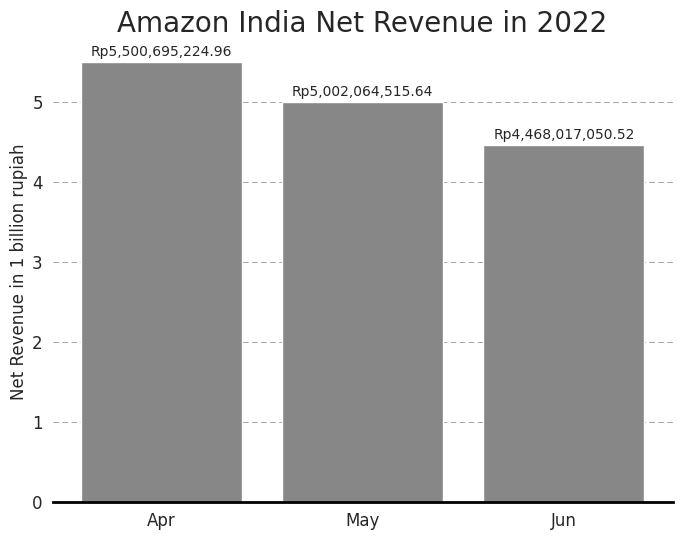

In [47]:
# plot the monthly sales revenue
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(monthly_sales.index.strftime('%b'), monthly_sales['order_amount_(Rp)'], color='#878787')


# add label above bar
ax.annotate(f'Rp{monthly_sales.iloc[0][0]:,.2f}',
            xy=(bars[0].get_x() + bars[0].get_width()/2, bars[0].get_height()-50000000),
            xytext=(0, 5), textcoords='offset points',
            ha='center', va='bottom', fontsize=10)

ax.annotate(f'Rp{monthly_sales.iloc[1][0]:,.2f}',
            xy=(bars[1].get_x() + bars[1].get_width()/2, bars[1].get_height()-50000000),
            xytext=(0, 5), textcoords='offset points',
            ha='center', va='bottom', fontsize=10)

ax.annotate(f'Rp{monthly_sales.iloc[2][0]:,.2f}',
            xy=(bars[2].get_x() + bars[2].get_width()/2, bars[2].get_height()-50000000),
            xytext=(0, 5), textcoords='offset points',
            ha='center', va='bottom', fontsize=10)

ax.set_title('Amazon India Net Revenue in 2022', fontsize=20)
ax.set_yticklabels(list(range(0,10)))
ax.set_ylabel('Net Revenue in 1 billion rupiah', fontsize=12, labelpad=3)
ax.yaxis.grid(linestyle='--', color='gray', linewidth=0.5, dashes=(8, 5))
ax.xaxis.grid(False)
ax.tick_params(axis='both', labelsize=12)

# remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.spines['bottom'].set_color('black')
plt.show()
fig.savefig('Monthly_Sales_Revenue.png', dpi=300)

#### Average Monthly Order Amount

In [48]:
# group the data by month and calculate the average order value
monthly_aov = df.groupby(pd.Grouper(key='date', freq='M')).agg({'order_amount_(Rp)': 'sum', 'order_id': 'nunique'})
monthly_aov['average_order_value'] = monthly_aov['order_amount_(Rp)'] / monthly_aov['order_id']

# calculate percent change from previous month
monthly_aov['pct_change'] = monthly_aov['average_order_value'].pct_change() * 100

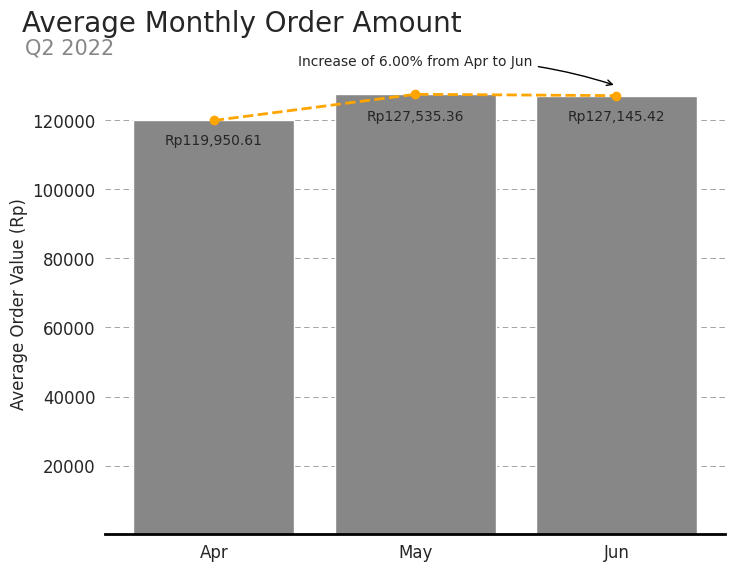

In [49]:
# create a barplot of the average order value per month
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x=monthly_aov.index.strftime('%b'), y=monthly_aov['average_order_value'], color='#878787')

# add line plot of the average order value per month
ax.plot(monthly_aov.index.strftime('%b'), monthly_aov['average_order_value'], linestyle='--', linewidth=2, color='orange', marker='o')

# add callout for percent increase from April to June
apr_val = monthly_aov['average_order_value'][0]
jun_val = monthly_aov['average_order_value'][2]
pct_change = ((jun_val - apr_val) / apr_val) * 100

ax.annotate(f'Increase of {pct_change:.2f}% from Apr to Jun',
            xy=(2,130000), xytext=(1, 135000), fontsize=10, ha='center', va='bottom',
            arrowprops=dict(arrowstyle='->', color='black', lw=1, connectionstyle="arc3,rad=-0.1"))

# add label for each bar
ax.annotate(f'Rp{monthly_aov.iloc[0][2]:,.2f}',
            xy=(0, 110000),
            xytext=(0, 5), textcoords='offset points',
            ha='center', va='bottom', fontsize=10)

ax.annotate(f'Rp{monthly_aov.iloc[1][2]:,.2f}',
            xy=(1,117000),
            xytext=(0, 5), textcoords='offset points',
            ha='center', va='bottom', fontsize=10)

ax.annotate(f'Rp{monthly_aov.iloc[2][2]:,.2f}',
            xy=(2,117000),
            xytext=(0, 5), textcoords='offset points',
            ha='center', va='bottom', fontsize=10)


# set labels and title
ax.set_title('Average Monthly Order Amount', fontsize=20, x=.22, y=1.07)
ax.text(-0.13, 1.04, 'Q2 2022', fontsize=15, color='#878787', transform=ax.transAxes)
ax.set_xlabel(None)
ax.set_ylabel('Average Order Value (Rp)', fontsize=12, labelpad=3)
ax.set_ylim(100, )
ax.yaxis.grid(linestyle='--', color='gray', linewidth=0.5, dashes=(8, 5))
ax.tick_params(axis='both', labelsize=12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.spines['bottom'].set_color('black')

plt.show()
fig.savefig('AVG_MOV.png', dpi=300)

#### Top Product Revenue by Month

In [50]:
import warnings
warnings.filterwarnings('ignore')

In [51]:
#define the desired order of months
month_order = ['April', 'May', 'June']

#filter the data to only include the four product categories of interest
sales_data = df[df['product_category'].isin(['Western Dress', 'Top', 'kurta', 'Set'])]

#convert the date column to a datetime object
sales_data['date'] = pd.to_datetime(sales_data['date'])

#extract the month from the date column and set it as a new column
sales_data['month'] = sales_data['date'].dt.month_name()

#aggregate the sales data by month and product category
sales_by_month = sales_data.groupby(['month', 'product_category'])['order_amount_(Rp)'].sum().reset_index()

#convert the month column to a categorical data type with the desired order
sales_by_month['month'] = pd.Categorical(sales_by_month['month'], categories=month_order, ordered=True)

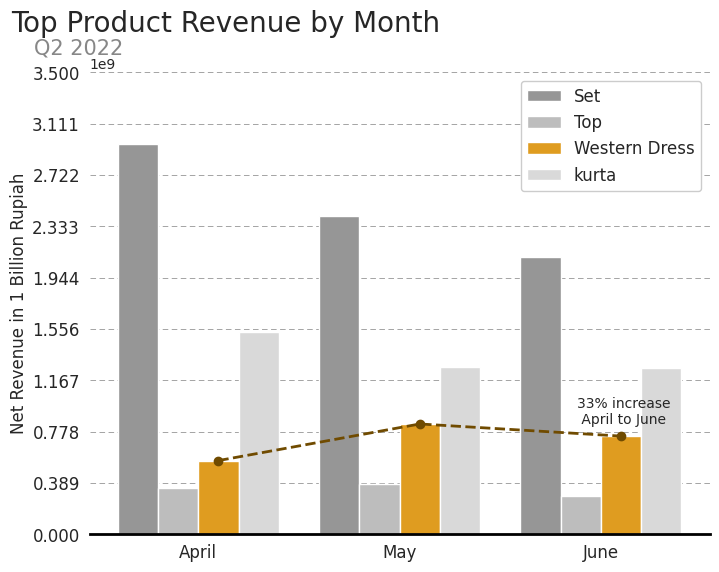

In [52]:
fig, ax= plt.subplots(figsize=(8,6))

#plot the sales data using seaborn
ax2 = sns.barplot(x='month', y='order_amount_(Rp)', hue='product_category', data=sales_by_month,
                 palette=['#969696', '#bdbdbd', 'orange', '#d9d9d9'])

#extract the sales data for Western Dress
sales_wd = sales_by_month[sales_by_month['product_category'] == 'Western Dress'].reset_index(drop=True)
sales_wd['month'] = pd.Categorical(sales_wd['month'], categories=month_order, ordered=True)
sales_wd.sort_values(by='month',inplace=True)

#add line plot for total monthly revenue of Western Dress
ax.plot([0.1,1.1,2.1], sales_wd['order_amount_(Rp)'], color='#704B00', linestyle='--', linewidth=2, marker='o')

#add annotation for percent increase from April to June for Western Dress
pct_increase = (sales_wd.loc[1, 'order_amount_(Rp)'] - sales_wd.loc[0, 'order_amount_(Rp)']) / sales_wd.loc[0, 'order_amount_(Rp)'] * 100
ax.annotate(f'{pct_increase:.0f}% increase\n April to June',
            xy=(2.1, sales_wd.loc[2, 'order_amount_(Rp)']), xytext=(1.88, sales_wd.loc[2, 'order_amount_(Rp)']))

#set the y ticks
num_y_ticks = 10
y_tick_values = np.linspace(ax.get_yticks()[0], ax.get_yticks()[-1], num_y_ticks)
ax.set_yticks(y_tick_values)

#add title and axis labels
ax.set_title('Top Product Revenue by Month', fontsize=20, x=.22, y=1.07)
ax.text(-0.09, 1.04, 'Q2 2022', fontsize=15, color='#878787', transform=ax.transAxes)

plt.legend(bbox_to_anchor=(1,1), fontsize=12, framealpha=1)

ax.set_xlabel(None)
ax.set_ylabel('Net Revenue in 1 Billion Rupiah', fontsize=12, labelpad=3)
ax.yaxis.grid(linestyle='--', color='gray', linewidth=0.5, dashes=(8, 5))

ax.tick_params(axis='both', labelsize=12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.spines['bottom'].set_color('black')


# Show the plot
plt.show()
fig.savefig('TopProduct_Revenue.png', dpi=300)
warnings.filterwarnings('default')  # Re-enable the warnings

#### Sales by Product Size

In [53]:
#group the data by product size and calculate the total sales
sales_by_size = df.groupby('size')['order_amount_(Rp)'].sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<ipython-input-54-00911d22a63c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_size.index, y=sales_by_size.values, ax=ax, palette=palette_colors)


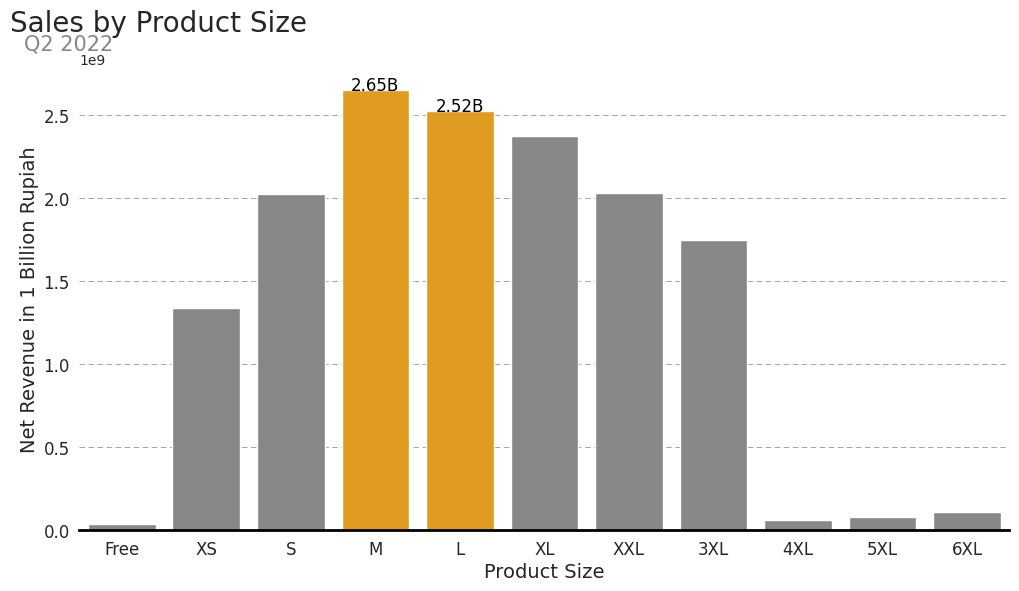

In [54]:
#create a horizontal bar chart to show the sales by product size
fig, ax = plt.subplots(figsize=(12,6))

#use a color palette to highlight specific sizes
palette_colors = ['orange' if size in ['M', 'L'] else '#878787' for size in sales_by_size.index]

sns.barplot(x=sales_by_size.index, y=sales_by_size.values, ax=ax, palette=palette_colors)

#set font sizes for x and y labels, title, and ticks
ax.set_xlabel('Product Size', labelpad=3, fontsize=14)
ax.set_ylabel('Net Revenue in 1 Billion Rupiah', labelpad=3, fontsize=14)
ax.set_title('Sales by Product Size', fontsize=20, x=0.085, y=1.05, pad=10)
ax.text(-0.06, 1.04, 'Q2 2022', fontsize=15, color='#878787', transform=ax.transAxes)

#set font sizes for the bars and add annotations for S, M, and L sizes
for i, size in enumerate(sales_by_size.index):
    if size in ['M', 'L']:
        ax.text(i, sales_by_size.values[i], f'{sales_by_size.values[i]/1000000000:.2f}B', ha='center', fontsize=12, color='black')

ax.tick_params(axis='both', labelsize=12)
ax.yaxis.grid(linestyle='--', color='gray', linewidth=0.5, dashes=(8, 5))
ax.xaxis.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.spines['bottom'].set_color('black')

plt.show()
fig.savefig('Sales_Prod_Size.png', dpi=300)